In [38]:
# import useful libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# import helper functions

In [39]:
data_folder = 'data'


def get_dataframes():
    train_X = pd.read_csv('../' + data_folder + '/' + 'train_X.csv')
    train_Y = pd.read_csv('../' + data_folder + '/' + 'train_y.csv')
    test_X = pd.read_csv('../' + data_folder + '/' + 'test_X.csv')
    test_Y = pd.read_csv('../' + data_folder + '/' + 'test_y.csv')
    return train_X, train_Y, test_X, test_Y


# import the test and train dataframes
train_X, train_Y, test_X, test_Y = get_dataframes()

train_X.info()

# # take just first 10000 rows for training
# train_X = train_X[:1000]
# train_Y = train_Y[:1000]

# # take just first 1000 rows for testing
# test_X = test_X[:200]
# test_Y = test_Y[:200]



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140398 entries, 0 to 140397
Data columns (total 40 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   heartrate         140398 non-null  float64
 1   handTemperature   140398 non-null  float64
 2   handAcc16_1       140398 non-null  float64
 3   handAcc16_2       140398 non-null  float64
 4   handAcc16_3       140398 non-null  float64
 5   handAcc6_1        140398 non-null  float64
 6   handAcc6_2        140398 non-null  float64
 7   handAcc6_3        140398 non-null  float64
 8   handGyro1         140398 non-null  float64
 9   handGyro2         140398 non-null  float64
 10  handGyro3         140398 non-null  float64
 11  handMagne1        140398 non-null  float64
 12  handMagne2        140398 non-null  float64
 13  handMagne3        140398 non-null  float64
 14  chestTemperature  140398 non-null  float64
 15  chestAcc16_1      140398 non-null  float64
 16  chestAcc16_2      14

In [40]:
import pickle
validation_k = 5
validation_scores = []
c_values = [0.001, 0.01, 0.1, 1.0, 10]
accuracies = {}
kernels = ['linear', 'poly', 'rbf', 'sigmoid']


def svm(isValidation=False):
    best_accuracy = 0
    best_kernel = ''
    best_c = 0
    for c in c_values:
        for kernel in kernels:
            svm_model = SVC(kernel=kernel, C=c, gamma=1)
            svm_model.fit(train_X, train_Y)
            if isValidation:
                scores = cross_val_score(
                    svm_model, train_X, train_Y, cv=validation_k)
                validation_scores.append(scores)
                print('Accuracy for C = ', c, ' is ', scores.mean(
                ), 'with standard deviation of ', scores.std(), 'and variance of ', scores.var())
            else:
                y_pred = svm_model.predict(test_X)
                accuracy = accuracy_score(test_Y, y_pred)
                accuracies[(c, kernel)] = accuracy
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_c = c
                    best_kernel = kernel
                    pickle.dump(svm_model, open(
                        '../models/svm_model.sav', 'wb'))
                print('Accuracy for C = ', c, 'and kernel : ',
                      kernel, ' is ', accuracy)

    if isValidation:
        return validation_scores
    else:
        return best_accuracy, best_c, best_kernel


In [41]:
best_accuracy, best_c, best_kernel = svm()

print('Best accuracy: ', best_accuracy)
print('Best C: ', best_c)
print('Best kernel: ', best_kernel)

# plot 3 line graphs for accuracy vs C for each kernel

def plot_accuracy_vs_c():
    for kernel in kernels:
        accuracy_vs_c = []
        for c in c_values:
            accuracy_vs_c.append(accuracies[(c, kernel)])
            print(c)
        plt.plot(c_values, accuracy_vs_c, label=kernel)
    plt.xlabel('C')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_accuracy_vs_c()

Accuracy for C =  0.001 and kernel :  linear  is  0.8573789173789174


Accuracy for C =  0.001  is  0.7380000000000001 with standard deviation of  0.012884098726725137 and variance of  0.0001660000000000003
Accuracy for C =  0.01  is  0.7380000000000001 with standard deviation of  0.012884098726725137 and variance of  0.0001660000000000003
Accuracy for C =  0.1  is  0.7380000000000001 with standard deviation of  0.012884098726725137 and variance of  0.0001660000000000003
Accuracy for C =  1.0  is  0.7380000000000001 with standard deviation of  0.012884098726725137 and variance of  0.0001660000000000003


ValueError: x and y must have same first dimension, but have shapes (4,) and (5,)

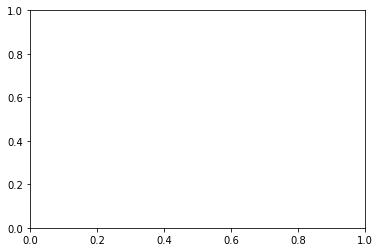

In [ ]:
# get the validation scores for best kernel   (ONLY FOR BEST KERNEL)
kernels = [best_kernel]
validation_scores = svm(isValidation=True)

# plot the validation scores for each C for best kernel


def plot_validation_scores():
    plt.plot(c_values, validation_scores[i])
    plt.xlabel('C')
    plt.ylabel('Accuracy for ' + best_kernel + ' kernel')
    plt.show()


plot_validation_scores()


In [ ]:

def load_model_predict():
    loaded_model = pickle.load(open('../models/svm_model.sav', 'rb'))
    result = loaded_model.score(test_X, test_Y)
    print(result)


load_model_predict()


0.815
